In [72]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%html
<img src = "churn_rate_problem.png">

## Importing Dataset

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset contains the details of customers in which both numerical and categorical
data are present. Here "Churn" is thee target variable which contains 2 categories so 
it will be termed as "Classification problem" where we need to predict the several
churn using the classification models. 


In [75]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [76]:
df.tail(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.4,No
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No


## EDA(EXPLORATORY DATA ANALYSIS)

In [77]:
# CHECKING THE DIMENSION FO THE DATASET
df.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns. Out of which 21 is target vaiable (churn) and remaining 20 are independent variable. 

In [78]:
# checking the columns of dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [79]:
df.dtypes #checking the data type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are three different types of data (int64, object, float64)

In [80]:
a = "12.5"
type(a)

str

In [81]:
a= 12.5
type(a)

float

In [82]:
#checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
df.isnull().sum().sum()

0

In [84]:
df.info() #checking the information on the datafroma.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see there are no null values present in this dataset

## Data Visualization

<AxesSubplot:>

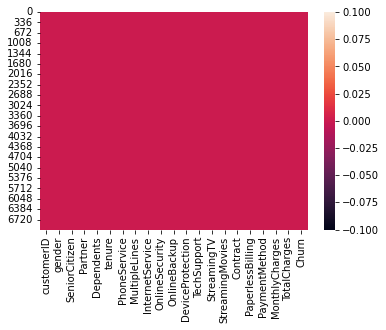

In [85]:
#lets visualize it using heatmap

sn.heatmap(df.isnull())

we can clearly visualize that there is no null values in the dataset

In [86]:
#checking the value of counts of each column, meaning how many times every unique value appears in a column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

In [87]:
df.columns.value_counts()

customerID          1
DeviceProtection    1
TotalCharges        1
MonthlyCharges      1
PaymentMethod       1
PaperlessBilling    1
Contract            1
StreamingMovies     1
StreamingTV         1
TechSupport         1
OnlineBackup        1
gender              1
OnlineSecurity      1
InternetService     1
MultipleLines       1
PhoneService        1
tenure              1
Dependents          1
Partner             1
SeniorCitizen       1
Churn               1
dtype: int64

These are the values counts of all columns and we can see blank in TotalCharges column. Lets check out the unique values of that column

In [88]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [89]:
df["TotalCharges"].nunique() #total unit value  out of 7043 rows is 6531 =! 7043. so this is a classification problem. 

6531

In [90]:
df.shape[0]

7043

What we notice is that "TotalCharges" has continuous dat but it's reflecting as object datatype. This is because 11 records of this column has blank data. lets handle this column

In [91]:
#checking the space in TotalCharges column, loc method here is use to do slicing base on the columns names. iloc with be base on the index
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has space as values but is was showing 0 missing values in this column. Let's fill this column bu some values

In [92]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)  #the nan values has no kind of data type. 
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [93]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [94]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [95]:
df["TotalCharges"].dtype

dtype('float64')

Now we can see total charges columns has some space values which is replaced by nan values. Now we will handle the nan values

In [96]:
np.mean(df["TotalCharges"])

2283.3004408418697

In [97]:
df.iloc[488, :]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [98]:
# checking the mean of TotalCharges column
print("The mean value of TotalCharges is: ", df["TotalCharges"].mean())

The mean value of TotalCharges is:  2283.3004408418697


In [99]:
# filling null values in TotalCharges with its mean: we are using mean because the data is continous if it was categorical then we would use mode

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

<AxesSubplot:>

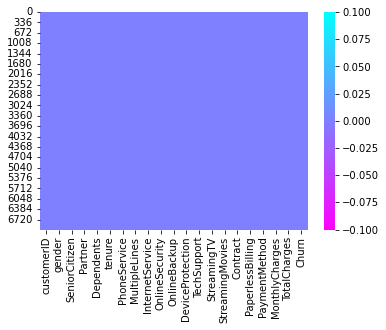

In [100]:
# let's check the null values again             #choose colour template https://seaborn.pydata.org/tutorial/color_palettes.html
sn.heatmap(df.isnull(), cmap="cool_r")

Now we can see there are no missing values in any of the column

In [101]:
# Separating Numerical and Categorical columns

# Checking for Categorical columns

Categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        Categorical_col.append(i)
print("Categorical Columns: ", Categorical_col)
print("\n")

#Checking for Numerical Columns
Numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        Numerical_col.append(i)
print("Numerical Columns: ", Numerical_col)
print("\n")


Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']




In [102]:
#Checkin the number of unique values in each column
df.nunique().to_frame("No. of unique values"), #to_frame is used to create a data frame for the selected code

(                  No. of unique values
 customerID                        7043
 gender                               2
 SeniorCitizen                        2
 Partner                              2
 Dependents                           2
 tenure                              73
 PhoneService                         2
 MultipleLines                        3
 InternetService                      3
 OnlineSecurity                       3
 OnlineBackup                         3
 DeviceProtection                     3
 TechSupport                          3
 StreamingTV                          3
 StreamingMovies                      3
 Contract                             3
 PaperlessBilling                     2
 PaymentMethod                        4
 MonthlyCharges                    1585
 TotalCharges                      6531
 Churn                                2,)

These are the unique values present in the dataset.
Here "CustomerID" column has the dat of unique ID
to the customers which can be dropped because it 
does not contribute to anything

In [103]:
df.drop("customerID", axis=1, inplace=True) #operation is performed columnwise so axis=1 and inplace = True to make a permanent replacement


In [104]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [106]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can assume that "No" stands for the custommers who have not churned
and "yes" stands for the custommers who have got churned
from the company. 
also, the problem is binary classification and we also see that the data is not well balance
the No is 5174 and the yes is 1869. Therefore there is a class inbalance problem. 

## Description of Dataset

In [107]:
#Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This give the statiscal information of the numerical
columns. The summary of the dataset looks perfect 
there is no negative/incvalid values present. 

From the above description we can observe there following:

1. The counts of all the columns are same which means the are no missing values in the dataset.
    
2. The mean valuesue is greater than the median(50%) in tenure and TotalCharges columns which means the data is skewed to right in these columns.

3. The data in the column MonthlyCharges have mean values less than the median, the data is skewed to left
    
4. By summarixeing the data we can observe there is a shuge differences between 75% and max hence there are outliers in the data
    
5. We can also notice the Standard deviation, min 25% perfectrcentile values from this describe method.

## Data Visualization

No     5174
Yes    1869
Name: Churn, dtype: int64


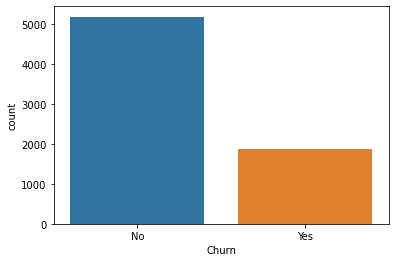

In [38]:
#Visualize the number of Chruned customers
ax = sn.countplot(x="Churn", data =df)
print(df["Churn"].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


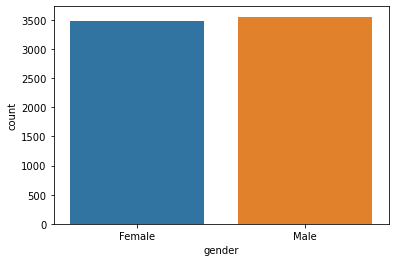

In [39]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="gender", data =df)
print(df["gender"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


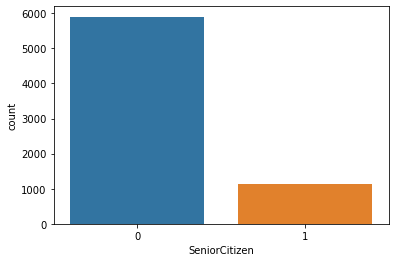

In [40]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="SeniorCitizen", data =df)
print(df["SeniorCitizen"].value_counts())

here we have the number of seniorcitizen (1) very low respect to the non , data inbalance

No     3641
Yes    3402
Name: Partner, dtype: int64


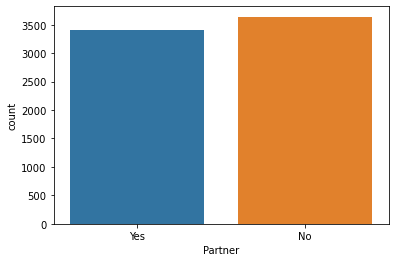

In [41]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="Partner", data =df)
print(df["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


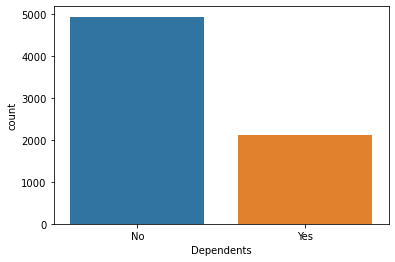

In [43]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="Dependents", data =df)
print(df["Dependents"].value_counts())

non dependents are mostly students and people not 
working and therefore most parents won't allow their
children to have a phone hence the non dependents have a higher count_value

Yes    6361
No      682
Name: PhoneService, dtype: int64


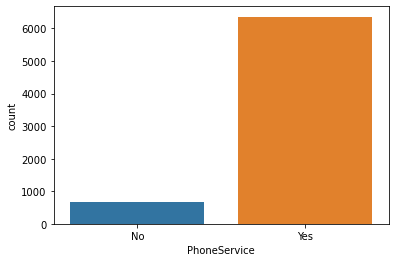

In [44]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="PhoneService", data =df)
print(df["PhoneService"].value_counts())

The customers who have phone services are large in number and who do not own phone services are very less in numberr

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


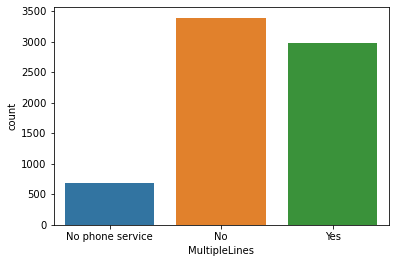

In [45]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="MultipleLines", data =df)
print(df["MultipleLines"].value_counts())

The customers having phoneservices from single line
have high count compared to the customers having phone services from multiple lines.
also the customers who do not have phone services have covered very less dat compared to the others

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


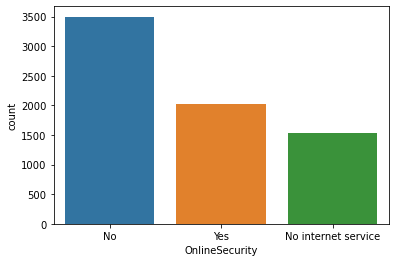

In [46]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="OnlineSecurity", data =df)
print(df["OnlineSecurity"].value_counts())

the person with no internet servie do not need online security and those with inther service need online security. however those with internet service has low count in online security

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


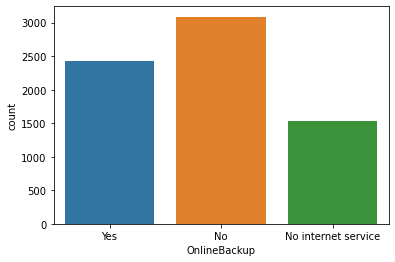

In [47]:
 #Visualize the number of Chruned customers
ax = sn.countplot(x="OnlineBackup", data =df)
print(df["OnlineBackup"].value_counts())

if you are not using internt service then you don't need online back up
those who are using internet service their count is 2429 and those who 
are using internett services but have not online backup services is
3088. 

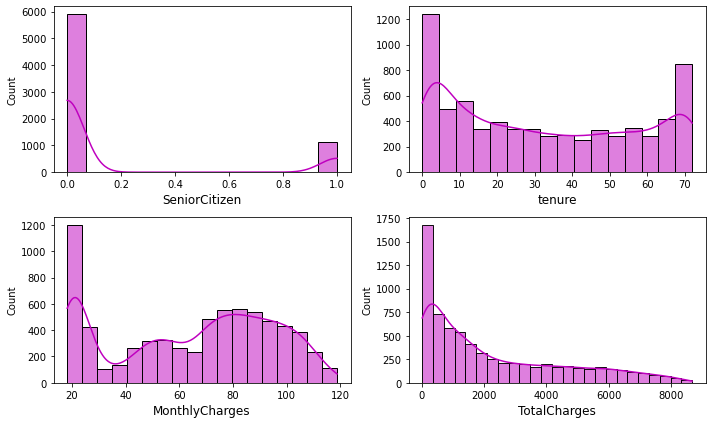

In [48]:
# Now let's check the distrubution of the data other data in the column

plt.figure(figsize=(10, 6), facecolor="white")
plotnumber = 1

for col in Numerical_col:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sn.histplot(df[col], color="m", kde=True) 
        plt.xlabel(col, fontsize=12)
        plt.xticks(rotation=0, fontsize=10)  
        plt.yticks(fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()  # Display the entire grid of subplots


##  Bivarite Analysis

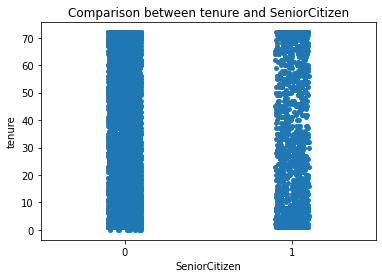

In [49]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sn.stripplot(x="SeniorCitizen", y="tenure", data =df)
plt.show()

both of them present the same or less tenure but there is a slight different in distribution in senior citizen (irregular)

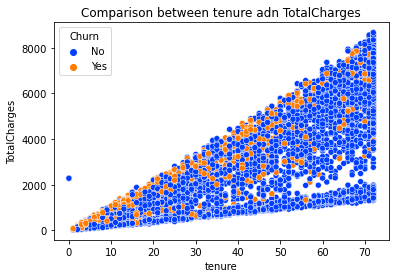

In [50]:
# Comparing tenure and totalcharges
plt.title("Comparison between tenure adn TotalCharges")
sn.scatterplot(x="tenure", y="TotalCharges", data =df, hue="Churn", palette="bright")
plt.show()

Here we can notice the strong linear relationship between the features
As the tenure increases, TotalCharges also increases rapidly. 
if the customers have low tenure services then there is high chance of churn

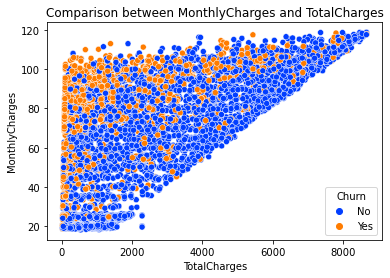

In [51]:
# Comparing tenure and totalcharges
plt.title("Comparison between MonthlyCharges and TotalCharges")
sn.scatterplot(x="TotalCharges", y="MonthlyCharges", data =df, hue="Churn", palette="bright")
plt.show()

There is a linear relationship between the two but as the monthly charges
increases the churn increses. 

## Multivariate Analysis

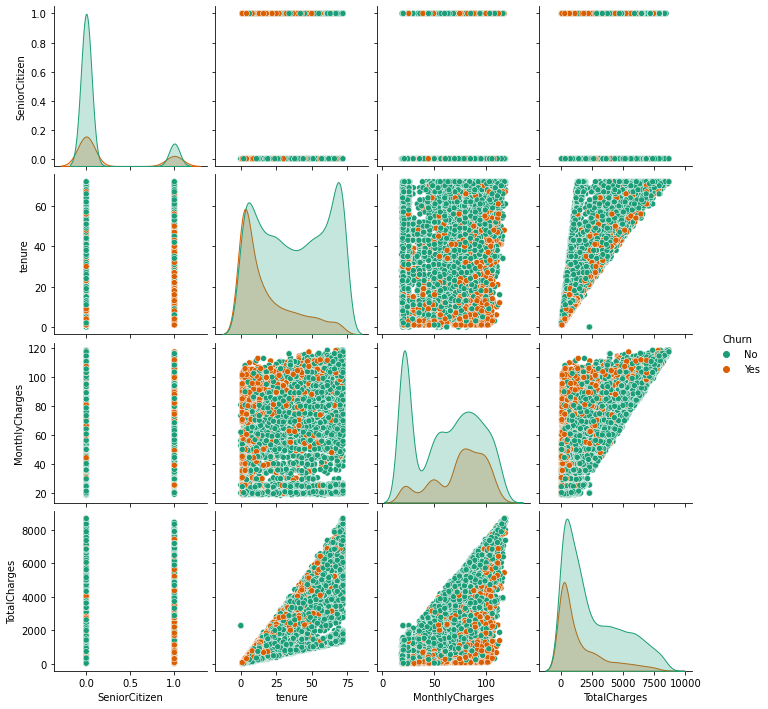

In [52]:
sn.pairplot(df, hue ="Churn", palette="Dark2")
plt.show()

## Checking for outliers

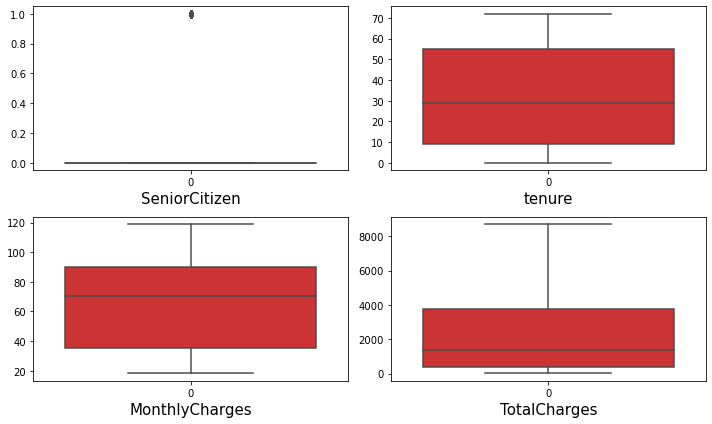

In [53]:
plt.figure(figsize=(10, 6), facecolor="white")
plotnumber = 1

for col in Numerical_col:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sn.boxplot(df[col], palette="Set1") 
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)  
    plotnumber += 1

plt.tight_layout()
plt.show()  # Display the entire grid of subplots

The numerical data has no outlier; the SeniorCitizen present outliers but it's a categorical data, no need to remove the outliers

## Checking for skewnes

In [108]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since
SeniorCitizen is categorical no need to remove skewness. 
Since TotalCharges is continuous in nature, lets use cube method to remove skewness.

## Remove skewness

In [109]:
# Removing skewness using cuberoot method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [110]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

we can see the skewness has been reduced drastically in TotalCharges column

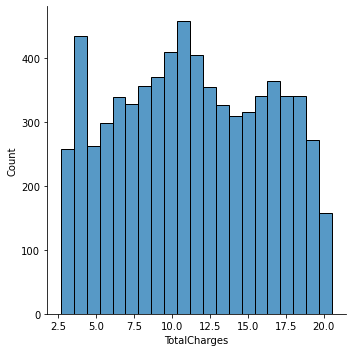

In [111]:
## lets's visualize the skewness in TotalCharges
sn.displot(df["TotalCharges"])
plt.show()

Now the distribution looks almost normal and skewness is removed.

## ENCODING CATEGORICAL DATA

In [112]:
# Encoding categorical data using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0


In [113]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


## CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLES.

In [115]:
#Checking the correlation between fearture and the targe

corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


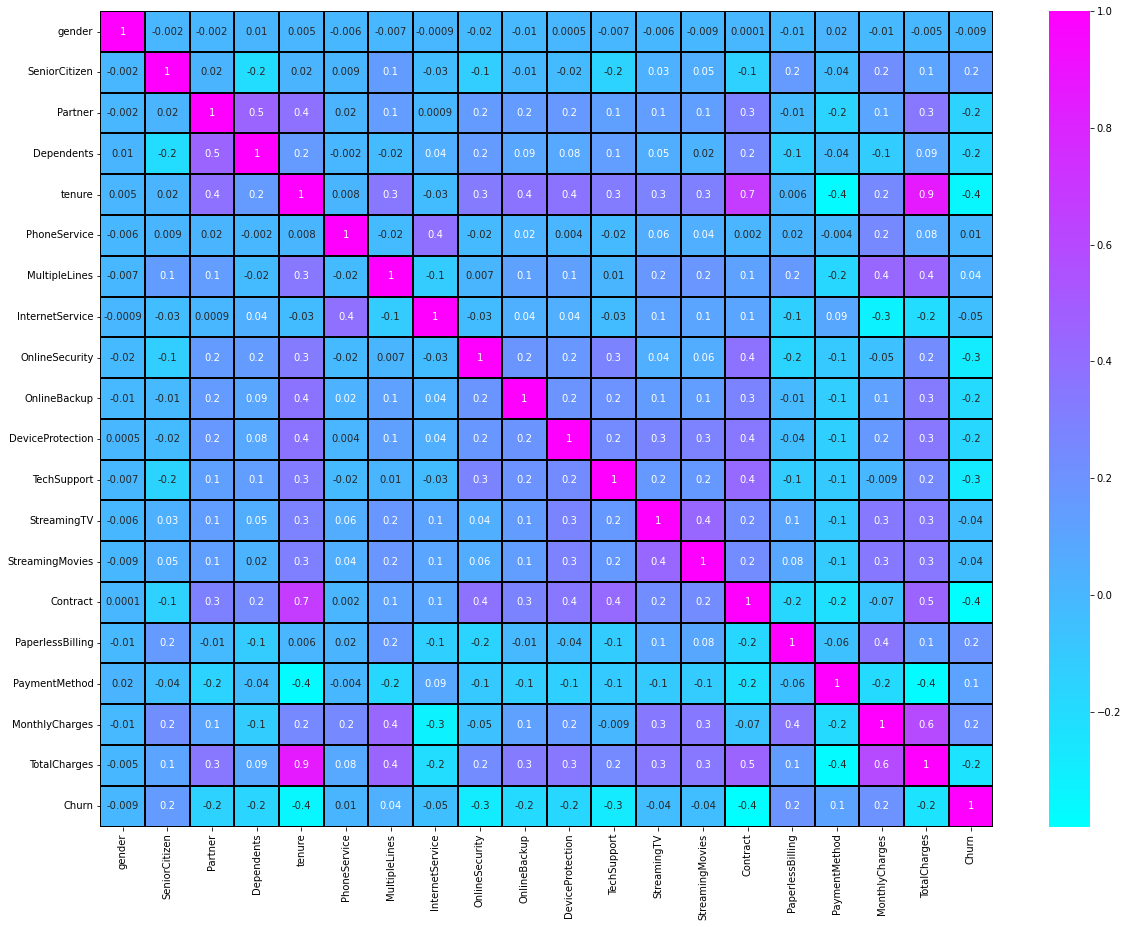

In [43]:
# Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize=(20,15))
sn.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="Black", annot=True, cmap="cool")
plt.yticks(rotation=0)
plt.show()

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between feature to feature to label. This heatmap contains both positive and negative correlationo. 

1. There is no much positive correlation between the target and feature.
2. The column MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with the label "churcn".
3. The label is negativevely correlated with thee Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents. 
4. Also the column gender has vary correlatio with the label, we can drop it if necessary.
There column TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. 


In [116]:
corr["Churn"].sort_values(ascending =False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

## Visualiing the correlation between label and features using bar plot

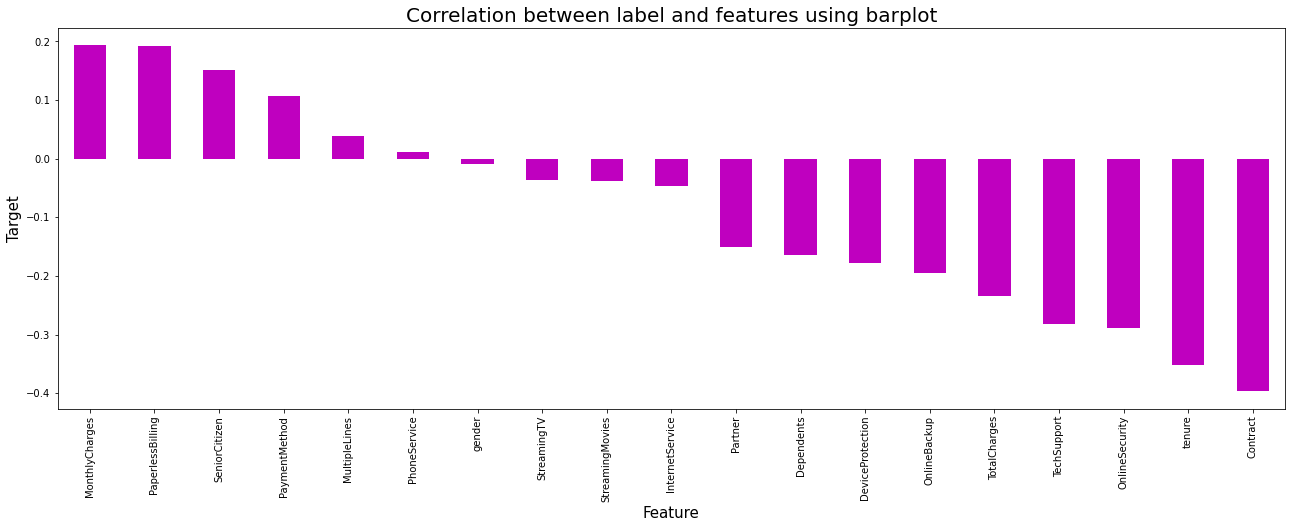

In [72]:
plt.figure(figsize=(22,7))
df.corr()["Churn"].sort_values(ascending = False).drop(["Churn"]).plot(kind = "bar", color = "m")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize= 20)
plt.show()

## Separating Scaling using Standard Scalarization

In [117]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

## Feature Scaling using Standard Scalarization

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


# MultiColiearity
# Cheking Variance Inflation(VIF)

In [119]:
# finding variance inflation factor in each scaled column(i.e, x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Fearures"]=x.columns

vif

,VIF values,Fearures
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking values we can find the features causing multicollinearity problem. Here we can find the TotalCharges and tenure have VIF value greater
than 10 which means they haveve ghigh correlation with other featureses. we will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF. 

In [120]:
#Dropping TotalCharges column

x.drop("TotalCharges", axis=1, inplace=True)

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Fearures"]=x.columns

vif

,VIF values,Fearures
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


Now tenure has reduced and we hasve solved the multicollinearity problem. We can move ahead for the model building

In [122]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that the data is not balanced, since it is a classification we will balance the data using oversampling method. 

## Oversampling

In [123]:
# oversampling the dataa
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [124]:
# checking value count of target column
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [125]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

## Modelling

## find the best random state

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [127]:
maxAccu = 0
maxRS = 0 

for i in range(1, 200):
    x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if (acc > maxAccu):
        maxAccu = acc
        maxRS = i
print("Best accuracy is ", maxAccu, "at random_state", maxRS)

Best accuracy is  0.8650563607085346 at random_state 71


## Creating train split test

In [128]:
x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=maxRS)


In [129]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

## RandomForestClassifier

In [130]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predictRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predictRFC))
print(confusion_matrix(y_test, predictRFC))
print(classification_report(y_test, predictRFC))

0.8573268921095009
[[1338  224]
 [ 219 1324]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1562
         1.0       0.86      0.86      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



In [131]:
rfc = RandomForestClassifier()
lg = LogisticRegression()
exc = ExtraTreesClassifier()
svc = SVC()
gbc =GradientBoostingClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()

models = [rfc, lg, exc, svc, gbc, abc,bc]
for model in models:
    model.fit(x_train, y_train)
    model.score(x_train, y_train)
    pred_model = model.predict(x_test)
    print("Accuracy score of ", model, "is: ")
    print(accuracy_score(y_test ,pred_model))
    print(confusion_matrix(y_test,pred_model))
    print(classification_report(y_test,pred_model))
    print('\n')

Accuracy score of  RandomForestClassifier() is: 
0.8579710144927536
[[1329  233]
 [ 208 1335]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1562
         1.0       0.85      0.87      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Accuracy score of  LogisticRegression() is: 
0.7800322061191627
[[1177  385]
 [ 298 1245]]
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78      1562
         1.0       0.76      0.81      0.78      1543

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



Accuracy score of  ExtraTreesClassifier() is: 
0.8647342995169082
[[1327  235]
 [ 185 1358]]
              precision    recall  f1-score   support

        

# Cross Validation Score (parameter to check the well fitting)

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
models = [rfc, lg, exc, svc, gbc, abc,bc]

for model in models:
    score = cross_val_score(model,x,y,cv=5) 
    print("Cross validare score of ", model, "is: ")
    print(score)   
    print("cross validation score mean is ", score.mean())
    print("cross validation score std is ", score.std())
    print("Difference between Accuracy score and cross validation score is", accuracy_score(y_test ,pred_model)-score.mean())
    print('\n')

Cross validare score of  RandomForestClassifier() is: 
[0.79134138 0.7828247  0.7735983  0.78764205 0.796875  ]
cross validation score mean is  0.7864562834699013
cross validation score std is  0.007903620159474887
Difference between Accuracy score and cross validation score is 0.054767549058279075


Cross validare score of  LogisticRegression() is: 
[0.80553584 0.81547197 0.78708304 0.80539773 0.80610795]
cross validation score mean is  0.8039193052777598
cross validation score std is  0.00923594047238629
Difference between Accuracy score and cross validation score is 0.03730452725042055


Cross validare score of  ExtraTreesClassifier() is: 
[0.79134138 0.77430802 0.75301632 0.77130682 0.77911932]
cross validation score mean is  0.7738183713465385
cross validation score std is  0.012445309186219004
Difference between Accuracy score and cross validation score is 0.06740546118164181


Cross validare score of  SVC() is: 
[0.79914833 0.80411639 0.78424414 0.79971591 0.80113636]
cross vali

The best model is the one with lower std and lower value of the difference between accuracy score and cross validation score, between the two we choose the lowest value difference:
The models present the same order and the difference between the accuracy score and cross validation is not relevante and therefore i opt for the ExtratreeClassifier with higher accuracy.

## HyperTuning

In [146]:

parameters = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 1000],  # Corrected parameter name to 'random_state'
    'max_depth': [None, 10, 30],      # Avoid using 0 for max_depth
    'n_jobs': [-1, 1],                # Avoid using -2 for n_jobs
    'n_estimators': [50, 100, 200, 300]
}

# Create the GridSearchCV instance
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 30],
                         'n_estimators': [50, 100, 200, 300], 'n_jobs': [-1, 1],
                         'random_state': [10, 50, 1000]})

In [147]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 50}

In [151]:
Final_model = ExtraTreesClassifier(criterion = "entropy", random_state = 50, max_depth = 30, n_jobs = -1, n_estimators =200)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("accuracy score %: ", acc*100)

accuracy score %:  86.40901771336554


## Plotting ROC and compare AUC for all models used

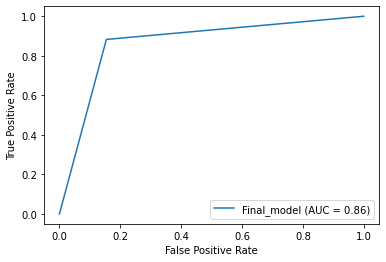

In [152]:
# sklearn.metric.RocCurveDisplay.from_predictions 
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Final_model')
display.plot()


ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are widely used tools in machine learning to evaluate the performance of binary classification models, especially when dealing with imbalanced datasets.

1. **ROC Curve**:
The ROC curve is a graphical representation of the performance of a binary classification model at various classification thresholds. It's created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) as the threshold for classifying positive and negative instances changes.

- **True Positive Rate (Sensitivity)**: It's the ratio of correctly predicted positive instances to the total actual positive instances.
   TPR = TP / (TP + FN)

- **False Positive Rate**: It's the ratio of incorrectly predicted positive instances to the total actual negative instances.
   FPR = FP / (FP + TN)

The ROC curve shows how well the model can distinguish between the two classes. A better model will have a curve that is closer to the top-left corner of the plot.

2. **AUC (Area Under the Curve)**:
AUC is a metric that quantifies the overall performance of a binary classification model based on its ROC curve. It represents the area under the ROC curve. The AUC value ranges from 0 to 1, where:
- AUC = 0.5: Model performs no better than random guessing.
- AUC > 0.5: Model performs better than random guessing.
- AUC = 1: Model has a perfect classification.

A higher AUC indicates a better-performing model in terms of its ability to distinguish between positive and negative instances across different classification thresholds.

In summary, the ROC curve and AUC provide a comprehensive view of a model's classification performance, especially in situations where you need to make a trade-off between the True Positive Rate and the False Positive Rate by changing the classification threshold. They are valuable tools for model evaluation and selection, especially in cases where class imbalances exist or where you want to understand the model's performance across different decision thresholds.

# Saving the Data

In [153]:
import joblib
joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

# Pridicting with the saving model (deserialization)

In [154]:
import joblib
model_loaded = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

# Making prediction
prediction = model_loaded.predict(x_test)
prediction

array([0., 0., 0., ..., 1., 1., 1.])

These are the predicted values

In [155]:
a = np.array(y_test)
df2 = pd.DataFrame()
df2["Predicted"] = prediction
df2["Original"] = a
df2

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3100,1.0,1.0
3101,0.0,0.0
3102,1.0,1.0
3103,1.0,1.0
